<a href="https://colab.research.google.com/github/patelyash9775/Deep-Learning-in-Tensorflow-2.x/blob/main/Advance%20Regression/02_Multiple_Regression_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Course: **TensorFlow 2: Advanced Linear & Lasso Regression in Python**

*Topic: Advanced Linear Regression*
  - *part-2: Feature Engineering*
    - *Lesson: Multiple Linear Regression*
    - *Lesson: LASSO Regression*
    - *Lesson: Feature Selection based on Penality Factor*

**PROJECT: CUSTOMER REVENUE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
os.chdir('drive/My Drive/Code/AdvancedLinearRegression/')

In [ ]:
ls preprocessing

x_norm.pickle  y_norm.pickle


In [ ]:
import pickle

### **Loading Data**

In [ ]:
# loading preprocessed data
x = pickle.load(open('preprocessing/x_norm.pickle','rb'))
y = pickle.load(open('preprocessing/y_norm.pickle','rb'))

In [ ]:
x.drop('index',axis=1,inplace=True) # drop index

### **Multiple Linear Regression**
$\hat y = a + b_1 X_1 + b_2 X_2 + ... + b_n X_n $

In [ ]:
# convert into array
x = x.values
y = y.values

In [ ]:
x.shape , y.shape

((3189, 13), (3189, 1))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
# multiple linear regression
def multi_regression():
  model = Sequential([
                      layers.Dense(units=1,input_shape=(13,))
  ])
  # 
  loss = tf.keras.losses.mean_squared_error
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  # complie
  model.compile(loss=loss,optimizer=optimizer,metrics=['mse'])
  return model

In [ ]:
model = multi_regression()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2551, 13), (638, 13), (2551, 1), (638, 1))

In [ ]:
# training multiple regression
history = model.fit(x_train,y_train,batch_size=100,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
26/26 [==============================] - 0s 7ms/step - loss: 2.4132 - mse: 2.4132 - val_loss: 2.4083 - val_mse: 2.4083
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 2.1448 - mse: 2.1448 - val_loss: 2.1693 - val_mse: 2.1693
Epoch 3/200
26/26 [==============================] - 0s 3ms/step - loss: 1.9180 - mse: 1.9180 - val_loss: 1.9702 - val_mse: 1.9702
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 1.7366 - mse: 1.7366 - val_loss: 1.7946 - val_mse: 1.7946
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 1.5785 - mse: 1.5785 - val_loss: 1.6590 - val_mse: 1.6590
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 1.4519 - mse: 1.4519 - val_loss: 1.5462 - val_mse: 1.5462
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 1.3459 - mse: 1.3459 - val_loss: 1.4497 - val_mse: 1.4497
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 1.2558 - m

In [ ]:
hist = history.history
df_hist = pd.DataFrame(hist)

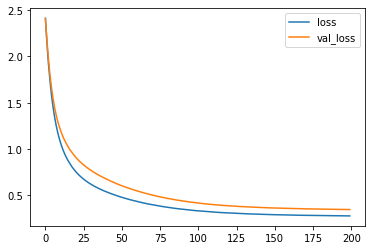

In [ ]:
# visualizing loss
df_hist[['loss','val_loss']].plot()

### **LASSO Regression**
- L1 Regularization

In [ ]:
from tensorflow.keras.regularizers import l1

In [ ]:
def lasso_regression(penality):
  model = Sequential([
                      layers.Dense(units=1,input_shape=(13,),kernel_regularizer=l1(penality))
  ])
  # loss and optimizer
  loss = tf.keras.losses.mean_squared_error
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile
  model.compile(optimizer=optimizer,loss=loss)
  return model

In [ ]:
# different penality factors
penality = [1e-10,3e-10,6e-10,9e-10,
            1e-9,3e-9,6e-9,9e-9,
            1e-8,3e-8,6e-8,9e-8,
            1e-7,3e-7,6e-7,9e-7,
            1e-6,3e-6,6e-6,9e-6,
            1e-5,3e-5,6e-5,9e-5,
            1e-4,3e-4,6e-4,9e-4,
            1e-3,3e-3,6e-3,9e-3,
            1e-2,3e-2,6e-2,9e-2,
            1e-1,3e-1,6e-1,1,3,6,10]

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.9768 - val_loss: 2.9660
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5614 - val_loss: 2.5627
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2155 - val_loss: 2.2110
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9130 - val_loss: 1.9316
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6686 - val_loss: 1.6923
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4641 - val_loss: 1.4980
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2983 - val_loss: 1.3386
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1625 - val_loss: 1.2115
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0539 - val_loss: 1.1093
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

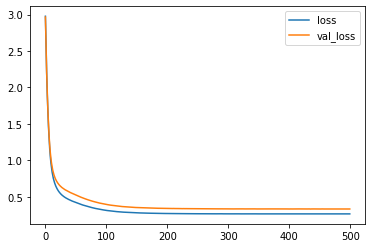

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 3.0119 - val_loss: 2.6940
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.6329 - val_loss: 2.3598
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2997 - val_loss: 2.0706
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0124 - val_loss: 1.8210
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7615 - val_loss: 1.6094
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5460 - val_loss: 1.4274
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3619 - val_loss: 1.2752
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2059 - val_loss: 1.1442
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0716 - val_loss: 1.0350
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

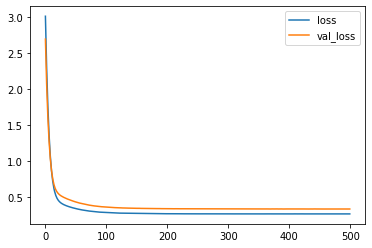

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4687 - val_loss: 2.4591
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1450 - val_loss: 2.1650
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8939 - val_loss: 1.9188
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6815 - val_loss: 1.7321
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5146 - val_loss: 1.5806
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3786 - val_loss: 1.4644
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2730 - val_loss: 1.3597
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1802 - val_loss: 1.2845
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1086 - val_loss: 1.2202
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

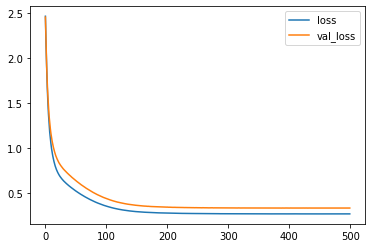

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 5ms/step - loss: 1.7228 - val_loss: 1.7522
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4787 - val_loss: 1.5176
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2844 - val_loss: 1.3354
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1352 - val_loss: 1.1988
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0222 - val_loss: 1.0954
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9352 - val_loss: 1.0158
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8674 - val_loss: 0.9542
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8134 - val_loss: 0.9038
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7693 - val_loss: 0.8625
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

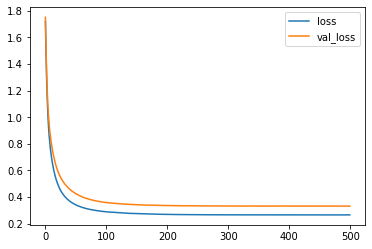

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 3.4502 - val_loss: 3.3919
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.1032 - val_loss: 3.0661
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8046 - val_loss: 2.7994
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5556 - val_loss: 2.5581
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3302 - val_loss: 2.3582
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1420 - val_loss: 2.1693
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9670 - val_loss: 2.0109
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8160 - val_loss: 1.8654
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6770 - val_loss: 1.7378
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

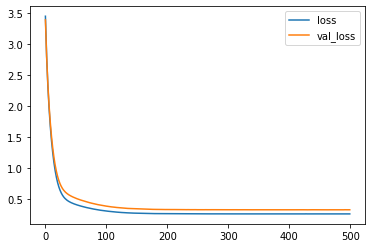

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 5.3848 - val_loss: 5.5715
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 4.8181 - val_loss: 5.0112
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 4.3172 - val_loss: 4.5116
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.8733 - val_loss: 4.0673
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 3.4845 - val_loss: 3.6721
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 3.1430 - val_loss: 3.3283
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8417 - val_loss: 3.0223
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5740 - val_loss: 2.7629
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3417 - val_loss: 2.5238
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

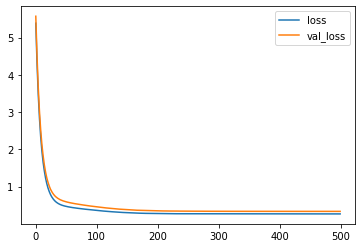

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.8268 - val_loss: 3.0540
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5468 - val_loss: 2.7566
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3037 - val_loss: 2.5038
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1020 - val_loss: 2.2880
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9243 - val_loss: 2.1131
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7763 - val_loss: 1.9512
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6398 - val_loss: 1.8132
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5208 - val_loss: 1.6960
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4187 - val_loss: 1.5860
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

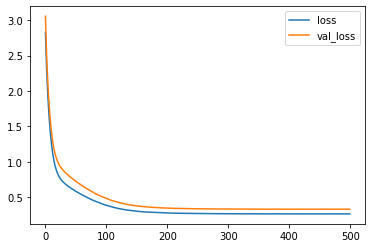

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8875 - val_loss: 1.8064
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6652 - val_loss: 1.6196
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4752 - val_loss: 1.4604
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3140 - val_loss: 1.3253
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1771 - val_loss: 1.2145
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0650 - val_loss: 1.1211
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9718 - val_loss: 1.0444
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8937 - val_loss: 0.9830
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8309 - val_loss: 0.9327
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

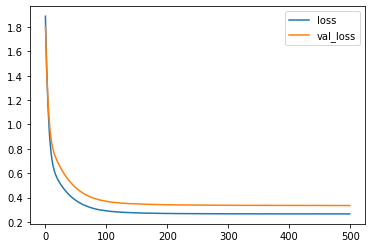

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 4.3217 - val_loss: 4.4774
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.8603 - val_loss: 4.0215
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.4591 - val_loss: 3.6174
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0995 - val_loss: 3.2782
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.7982 - val_loss: 2.9692
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5284 - val_loss: 2.7048
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2947 - val_loss: 2.4771
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0915 - val_loss: 2.2748
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9128 - val_loss: 2.1016
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

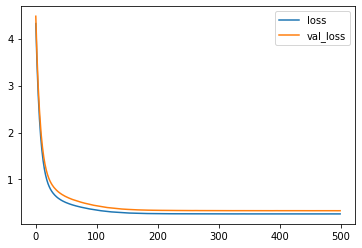

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9776 - val_loss: 1.9648
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7433 - val_loss: 1.7469
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5488 - val_loss: 1.5635
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3838 - val_loss: 1.4151
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2501 - val_loss: 1.2882
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1373 - val_loss: 1.1850
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0443 - val_loss: 1.0983
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9673 - val_loss: 1.0271
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9009 - val_loss: 0.9679
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

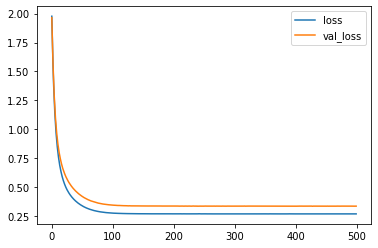

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5872 - val_loss: 1.7531
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4459 - val_loss: 1.6248
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3371 - val_loss: 1.5227
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2516 - val_loss: 1.4444
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1849 - val_loss: 1.3798
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1295 - val_loss: 1.3267
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0836 - val_loss: 1.2822
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0442 - val_loss: 1.2433
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0097 - val_loss: 1.2082
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

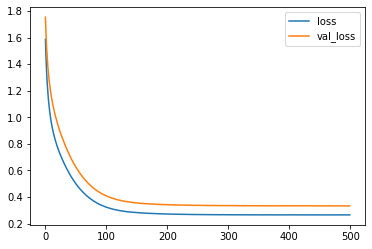

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9497 - val_loss: 1.9479
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7408 - val_loss: 1.7579
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5720 - val_loss: 1.6166
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4406 - val_loss: 1.4995
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3333 - val_loss: 1.4113
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2506 - val_loss: 1.3420
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1820 - val_loss: 1.2929
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1323 - val_loss: 1.2498
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0885 - val_loss: 1.2179
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

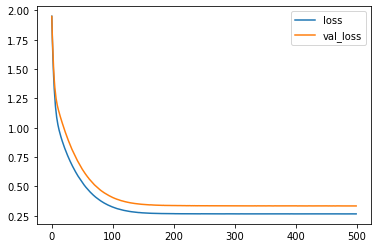

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1022 - val_loss: 2.3440
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9102 - val_loss: 2.1511
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7506 - val_loss: 1.9834
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6163 - val_loss: 1.8437
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4994 - val_loss: 1.7161
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3974 - val_loss: 1.6020
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3040 - val_loss: 1.4994
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2205 - val_loss: 1.4067
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1449 - val_loss: 1.3199
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

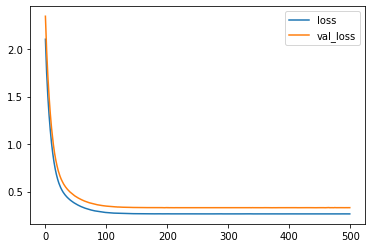

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6709 - val_loss: 1.7792
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4962 - val_loss: 1.6109
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3544 - val_loss: 1.4804
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2427 - val_loss: 1.3730
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1519 - val_loss: 1.2889
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0783 - val_loss: 1.2173
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0184 - val_loss: 1.1574
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9658 - val_loss: 1.1080
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9212 - val_loss: 1.0639
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

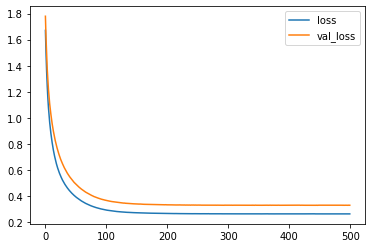

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2904 - val_loss: 1.3991
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1118 - val_loss: 1.2459
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9784 - val_loss: 1.1339
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8826 - val_loss: 1.0489
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8103 - val_loss: 0.9840
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7573 - val_loss: 0.9314
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7139 - val_loss: 0.8894
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6787 - val_loss: 0.8524
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6487 - val_loss: 0.8188
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

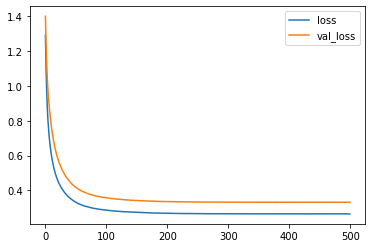

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 4.9801 - val_loss: 5.2369
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 4.4934 - val_loss: 4.7629
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 4.0813 - val_loss: 4.3219
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.7088 - val_loss: 3.9445
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 3.3832 - val_loss: 3.6175
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0953 - val_loss: 3.3354
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8484 - val_loss: 3.0727
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.6267 - val_loss: 2.8353
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 2.4265 - val_loss: 2.6307
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

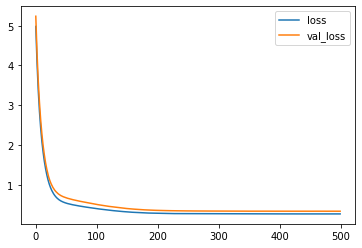

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2594 - val_loss: 2.3053
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0417 - val_loss: 2.0999
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8590 - val_loss: 1.9393
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7118 - val_loss: 1.7908
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5775 - val_loss: 1.6723
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4650 - val_loss: 1.5615
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3597 - val_loss: 1.4679
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2680 - val_loss: 1.3828
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1857 - val_loss: 1.3032
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

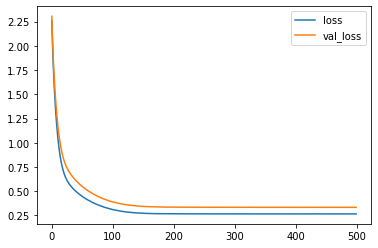

Running the model for lambda = 0.000003
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 6.7892 - val_loss: 7.1716
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 6.1831 - val_loss: 6.5246
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 5.6305 - val_loss: 5.9615
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 5.1472 - val_loss: 5.4415
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 4.7085 - val_loss: 4.9608
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 4.3194 - val_loss: 4.5492
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 3.9749 - val_loss: 4.1929
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 3.6684 - val_loss: 3.8748
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 3.3978 - val_loss: 3.5756
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

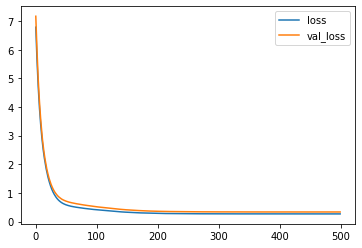

Running the model for lambda = 0.000006
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3825 - val_loss: 2.3170
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0978 - val_loss: 2.0546
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8582 - val_loss: 1.8381
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6622 - val_loss: 1.6532
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4936 - val_loss: 1.5005
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3505 - val_loss: 1.3714
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2304 - val_loss: 1.2613
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1259 - val_loss: 1.1695
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0386 - val_loss: 1.0914
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

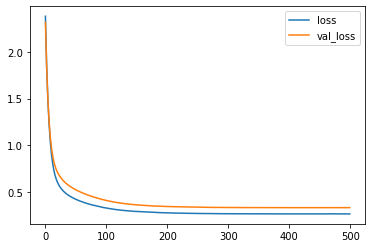

Running the model for lambda = 0.000009
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 3.2679 - val_loss: 3.0930
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8988 - val_loss: 2.7677
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5856 - val_loss: 2.4914
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3270 - val_loss: 2.2564
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1009 - val_loss: 2.0713
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9165 - val_loss: 1.9048
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7575 - val_loss: 1.7640
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6219 - val_loss: 1.6440
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5055 - val_loss: 1.5367
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

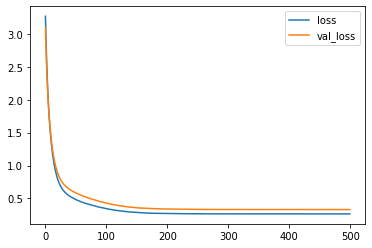

Running the model for lambda = 0.000010
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7985 - val_loss: 2.0021
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5555 - val_loss: 1.7426
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3635 - val_loss: 1.5398
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2137 - val_loss: 1.3787
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0970 - val_loss: 1.2546
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0050 - val_loss: 1.1630
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9357 - val_loss: 1.0855
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8762 - val_loss: 1.0271
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8300 - val_loss: 0.9762
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

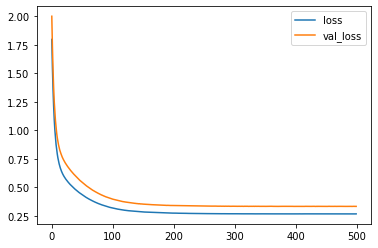

Running the model for lambda = 0.000030
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6797 - val_loss: 1.6451
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4460 - val_loss: 1.4290
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2615 - val_loss: 1.2600
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1146 - val_loss: 1.1238
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9943 - val_loss: 1.0185
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8963 - val_loss: 0.9316
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8165 - val_loss: 0.8592
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7501 - val_loss: 0.8034
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6966 - val_loss: 0.7576
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

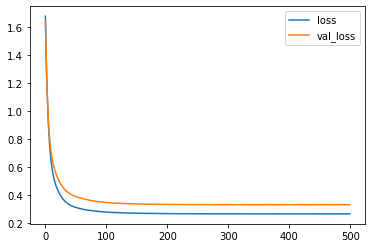

Running the model for lambda = 0.000060
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6744 - val_loss: 1.5968
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4651 - val_loss: 1.4232
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2983 - val_loss: 1.2885
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1670 - val_loss: 1.1802
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0617 - val_loss: 1.0968
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9786 - val_loss: 1.0292
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9112 - val_loss: 0.9742
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8563 - val_loss: 0.9291
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8102 - val_loss: 0.8920
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

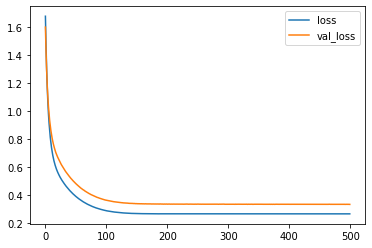

Running the model for lambda = 0.000090
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4754 - val_loss: 2.4491
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1731 - val_loss: 2.1602
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9209 - val_loss: 1.9322
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7149 - val_loss: 1.7444
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5473 - val_loss: 1.5884
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4078 - val_loss: 1.4641
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2941 - val_loss: 1.3589
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1983 - val_loss: 1.2696
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1152 - val_loss: 1.1966
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

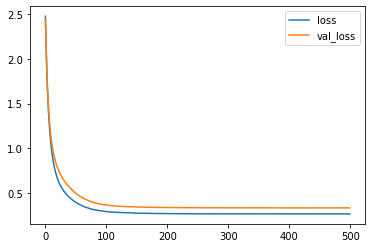

Running the model for lambda = 0.000100
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3943 - val_loss: 1.4743
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2535 - val_loss: 1.3585
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1456 - val_loss: 1.2682
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0618 - val_loss: 1.2003
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9988 - val_loss: 1.1461
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9468 - val_loss: 1.1011
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9044 - val_loss: 1.0620
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8677 - val_loss: 1.0279
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8366 - val_loss: 0.9967
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

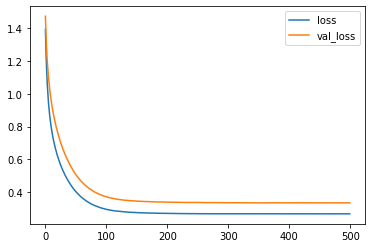

Running the model for lambda = 0.000300
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 4.2267 - val_loss: 4.0973
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.8757 - val_loss: 3.7640
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.5647 - val_loss: 3.4849
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2948 - val_loss: 3.2320
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0552 - val_loss: 3.0150
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8423 - val_loss: 2.8219
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.6609 - val_loss: 2.6367
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.4829 - val_loss: 2.4876
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3319 - val_loss: 2.3412
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

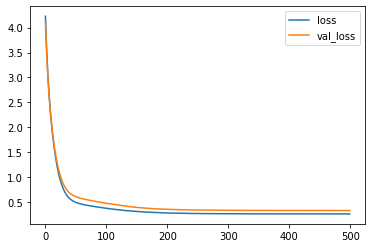

Running the model for lambda = 0.000600
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.6815 - val_loss: 2.5210
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3659 - val_loss: 2.2446
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1103 - val_loss: 2.0097
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8928 - val_loss: 1.8228
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7137 - val_loss: 1.6618
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5629 - val_loss: 1.5259
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4331 - val_loss: 1.4126
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3222 - val_loss: 1.3150
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2272 - val_loss: 1.2271
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

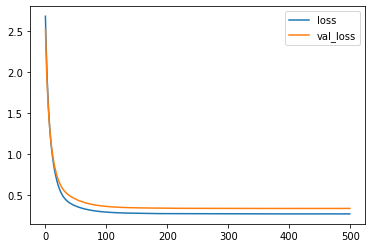

Running the model for lambda = 0.000900
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 3.6238 - val_loss: 3.3857
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2333 - val_loss: 3.0284
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8922 - val_loss: 2.7187
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5959 - val_loss: 2.4509
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3391 - val_loss: 2.2188
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1186 - val_loss: 2.0158
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9206 - val_loss: 1.8479
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7520 - val_loss: 1.6964
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6013 - val_loss: 1.5621
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

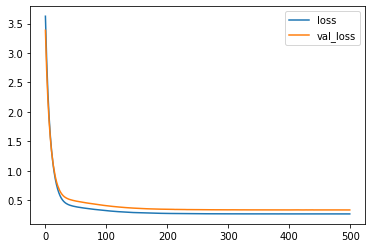

Running the model for lambda = 0.001000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3440 - val_loss: 2.2581
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0496 - val_loss: 1.9993
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8029 - val_loss: 1.7862
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5994 - val_loss: 1.6096
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4315 - val_loss: 1.4637
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2931 - val_loss: 1.3447
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1798 - val_loss: 1.2466
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0851 - val_loss: 1.1691
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0080 - val_loss: 1.1027
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

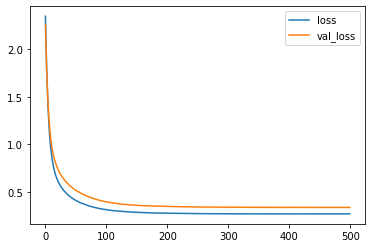

Running the model for lambda = 0.003000
Epoch 1/500
26/26 [==============================] - 0s 5ms/step - loss: 1.8603 - val_loss: 1.8635
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7005 - val_loss: 1.7169
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5600 - val_loss: 1.5853
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4344 - val_loss: 1.4680
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3231 - val_loss: 1.3646
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2242 - val_loss: 1.2729
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1345 - val_loss: 1.1937
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0568 - val_loss: 1.1208
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9861 - val_loss: 1.0596
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

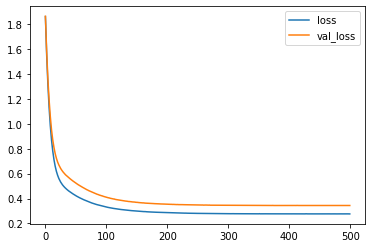

Running the model for lambda = 0.006000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 5.1394 - val_loss: 5.0274
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 4.7957 - val_loss: 4.7111
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 4.4867 - val_loss: 4.4122
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 4.2008 - val_loss: 4.1303
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 3.9348 - val_loss: 3.8788
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 3.6903 - val_loss: 3.6440
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 3.4636 - val_loss: 3.4277
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2537 - val_loss: 3.2252
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0572 - val_loss: 3.0374
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

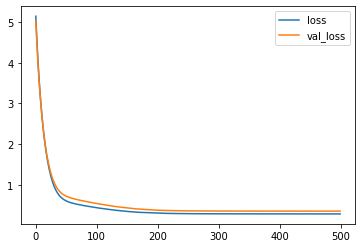

Running the model for lambda = 0.009000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7625 - val_loss: 2.6784
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.4951 - val_loss: 2.4244
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2572 - val_loss: 2.1984
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0510 - val_loss: 2.0019
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8669 - val_loss: 1.8288
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7067 - val_loss: 1.6789
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5640 - val_loss: 1.5530
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4409 - val_loss: 1.4363
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3300 - val_loss: 1.3360
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

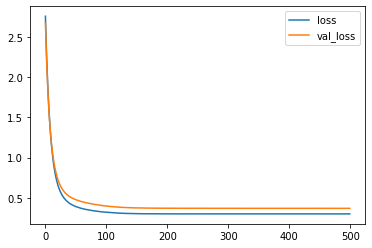

Running the model for lambda = 0.010000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7948 - val_loss: 1.7663
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6394 - val_loss: 1.6263
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5119 - val_loss: 1.5105
Epoch 4/500
26/26 [==============================] - 0s 9ms/step - loss: 1.3999 - val_loss: 1.4128
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3031 - val_loss: 1.3233
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2141 - val_loss: 1.2434
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1326 - val_loss: 1.1680
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0582 - val_loss: 1.1002
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9904 - val_loss: 1.0372
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

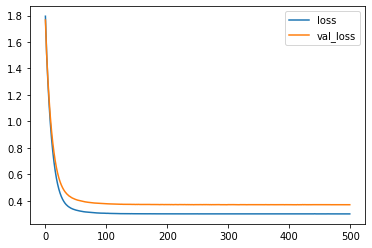

Running the model for lambda = 0.030000
Epoch 1/500
26/26 [==============================] - 0s 5ms/step - loss: 2.3628 - val_loss: 2.3771
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1716 - val_loss: 2.2097
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0177 - val_loss: 2.0723
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8864 - val_loss: 1.9565
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7747 - val_loss: 1.8551
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6737 - val_loss: 1.7686
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5842 - val_loss: 1.6870
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5037 - val_loss: 1.6154
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4322 - val_loss: 1.5506
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

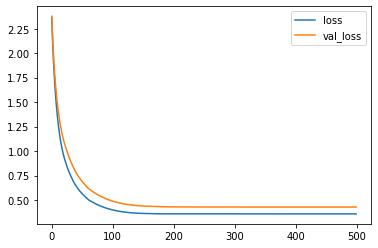

Running the model for lambda = 0.060000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1005 - val_loss: 2.1932
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8964 - val_loss: 1.9993
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7235 - val_loss: 1.8168
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5662 - val_loss: 1.6651
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4334 - val_loss: 1.5337
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3186 - val_loss: 1.4212
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2186 - val_loss: 1.3217
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1319 - val_loss: 1.2356
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0544 - val_loss: 1.1641
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

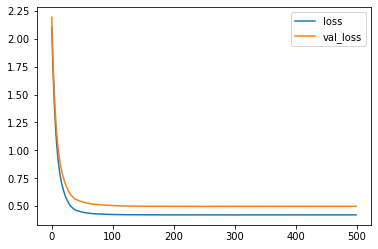

Running the model for lambda = 0.090000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 3.6772 - val_loss: 3.6705
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.3611 - val_loss: 3.3796
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0915 - val_loss: 3.1305
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8562 - val_loss: 2.9046
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.6421 - val_loss: 2.7061
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.4526 - val_loss: 2.5230
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2780 - val_loss: 2.3581
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1216 - val_loss: 2.2080
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9772 - val_loss: 2.0721
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

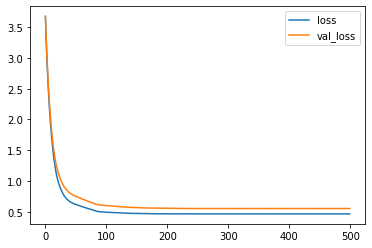

Running the model for lambda = 0.100000
Epoch 1/500
26/26 [==============================] - 0s 5ms/step - loss: 1.5163 - val_loss: 1.5950
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3676 - val_loss: 1.4603
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2479 - val_loss: 1.3497
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1548 - val_loss: 1.2640
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0809 - val_loss: 1.1973
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0218 - val_loss: 1.1407
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9743 - val_loss: 1.0940
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9328 - val_loss: 1.0539
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8962 - val_loss: 1.0174
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

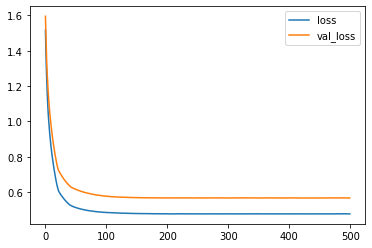

Running the model for lambda = 0.300000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7356 - val_loss: 1.7863
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6136 - val_loss: 1.6716
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5069 - val_loss: 1.5713
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4172 - val_loss: 1.4888
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3389 - val_loss: 1.4122
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2655 - val_loss: 1.3439
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2006 - val_loss: 1.2834
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1404 - val_loss: 1.2261
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0836 - val_loss: 1.1715
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

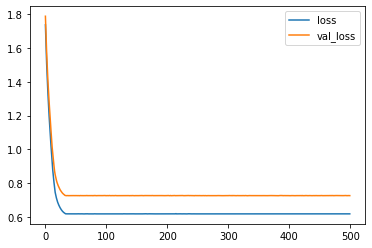

Running the model for lambda = 0.600000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 4.3638 - val_loss: 4.4431
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 4.0130 - val_loss: 4.1143
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.7236 - val_loss: 3.8342
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.4627 - val_loss: 3.5681
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2261 - val_loss: 3.3385
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0231 - val_loss: 3.1308
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.8316 - val_loss: 2.9357
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 2.6492 - val_loss: 2.7487
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 2.4757 - val_loss: 2.5689
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

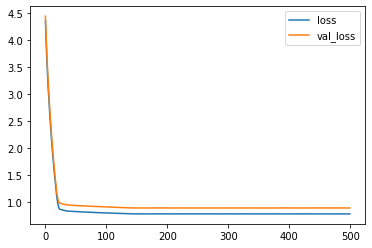

Running the model for lambda = 1.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 8.5374 - val_loss: 8.4304
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 7.8959 - val_loss: 7.8190
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 7.3214 - val_loss: 7.2695
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 6.7898 - val_loss: 6.7359
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 6.2755 - val_loss: 6.2367
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 5.7953 - val_loss: 5.7675
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 5.3652 - val_loss: 5.3597
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 4.9694 - val_loss: 4.9667
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 4.5873 - val_loss: 4.5866
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

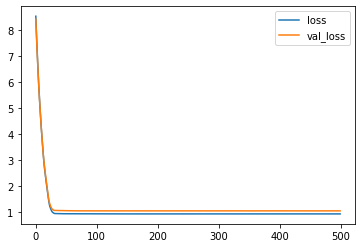

Running the model for lambda = 3.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 13.0994 - val_loss: 12.5435
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 12.0183 - val_loss: 11.4988
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 10.9732 - val_loss: 10.4794
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 9.9640 - val_loss: 9.5281
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 9.0342 - val_loss: 8.6209
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 8.1686 - val_loss: 7.8068
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 7.3641 - val_loss: 7.0480
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 6.6399 - val_loss: 6.3559
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 5.9574 - val_loss: 5.6922
Epoch 10/500
26/26 [==============================] - 0s 3ms/st

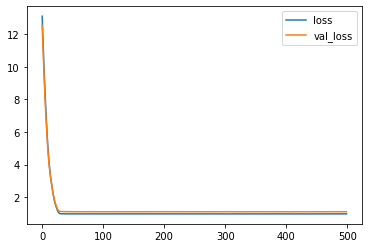

Running the model for lambda = 6.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 30.9553 - val_loss: 30.0865
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 28.3810 - val_loss: 27.5070
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 25.8682 - val_loss: 25.0205
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 23.6012 - val_loss: 22.9143
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 21.5720 - val_loss: 20.8930
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 19.5894 - val_loss: 18.9113
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 17.6495 - val_loss: 16.9758
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 15.8319 - val_loss: 15.2027
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 14.0967 - val_loss: 13.4630
Epoch 10/500
26/26 [==============================]

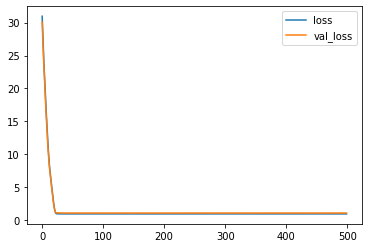

Running the model for lambda = 10.000000
Epoch 1/500
26/26 [==============================] - 0s 4ms/step - loss: 48.9630 - val_loss: 47.3002
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 45.1531 - val_loss: 43.6875
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 41.7327 - val_loss: 40.2932
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 38.4370 - val_loss: 36.9631
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 35.2079 - val_loss: 33.8164
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 32.2234 - val_loss: 30.8904
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 29.5075 - val_loss: 28.2871
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 26.9366 - val_loss: 25.7233
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 24.4049 - val_loss: 23.1912
Epoch 10/500
26/26 [==============================

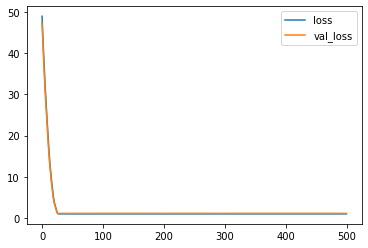

In [ ]:
# training model for each penality factor
loss_values = [] 
for lam in penality:
  print('Running the model for lambda = %f'%lam)
  # initilizing model with lambda
  model_lasso = lasso_regression(lam)
  # fitting the model
  history = model_lasso.fit(x_train,y_train,batch_size=100,epochs=500,validation_data=(x_test,y_test))
  # visualize loss for different iteration or epochs
  df_history = pd.DataFrame(history.history)
  df_history[['loss','val_loss']].plot()
  plt.show()
  #  save the weight 
  weights = model_lasso.get_weights() # coloumn 
  try:
    weight_penality = np.concatenate((weight_penality,weights[0].T),axis=0)
  except:
    weight_penality = weights[0].T # rows
  # loss
  loss_values.append(df_history.iloc[-1].to_dict())

### **Feature Selection**

In [ ]:
log_lambda = np.log10(penality)
# weight
df_weights = pd.DataFrame(weight_penality)
# loss
df_loss = pd.DataFrame(loss_values)

visualization

In [ ]:
df_weights.iloc[0]

0     0.064228
1     0.079159
2    -0.043030
3    -0.012875
4     1.059803
5     0.805004
6     0.068345
7    -0.063883
8    -1.194048
9    -0.099254
10    0.175268
11    0.065813
12   -0.018285
Name: 0, dtype: float32

In [ ]:
list(log_lambda).index(-2)

32

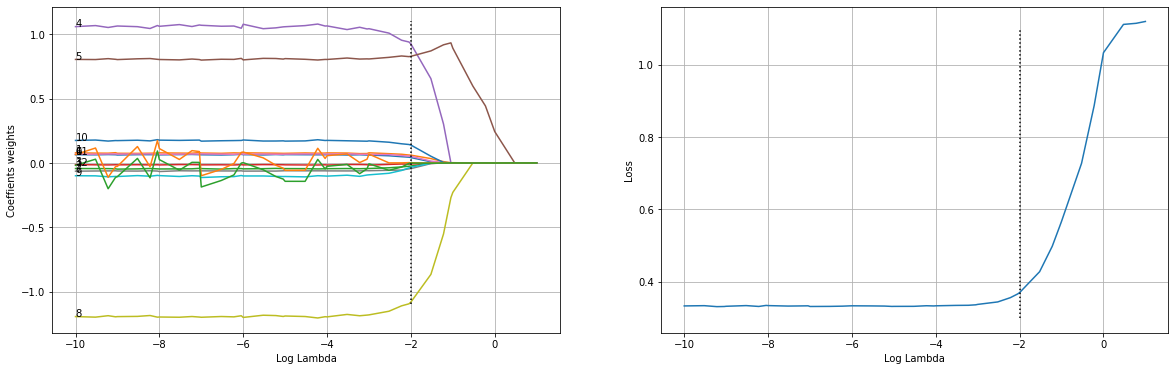

In [ ]:
# visualizing weight and loss
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(log_lambda,df_weights)
# label
plt.xlabel('Log Lambda')
plt.ylabel('Coeffients weights')
plt.grid()
# weight number
for i in range(13):
  plt.text(-10,df_weights.iloc[0][i],'%d'%i)

plt.plot([-2,-2],[-1.1,1.1],'k:')
  

plt.subplot(1,2,2)
plt.plot(log_lambda,df_loss['val_loss'])
plt.xlabel('Log Lambda')
plt.ylabel('Loss')
plt.grid()
plt.plot([-2,-2],[0.3,1.1],'k:')


plt.show()

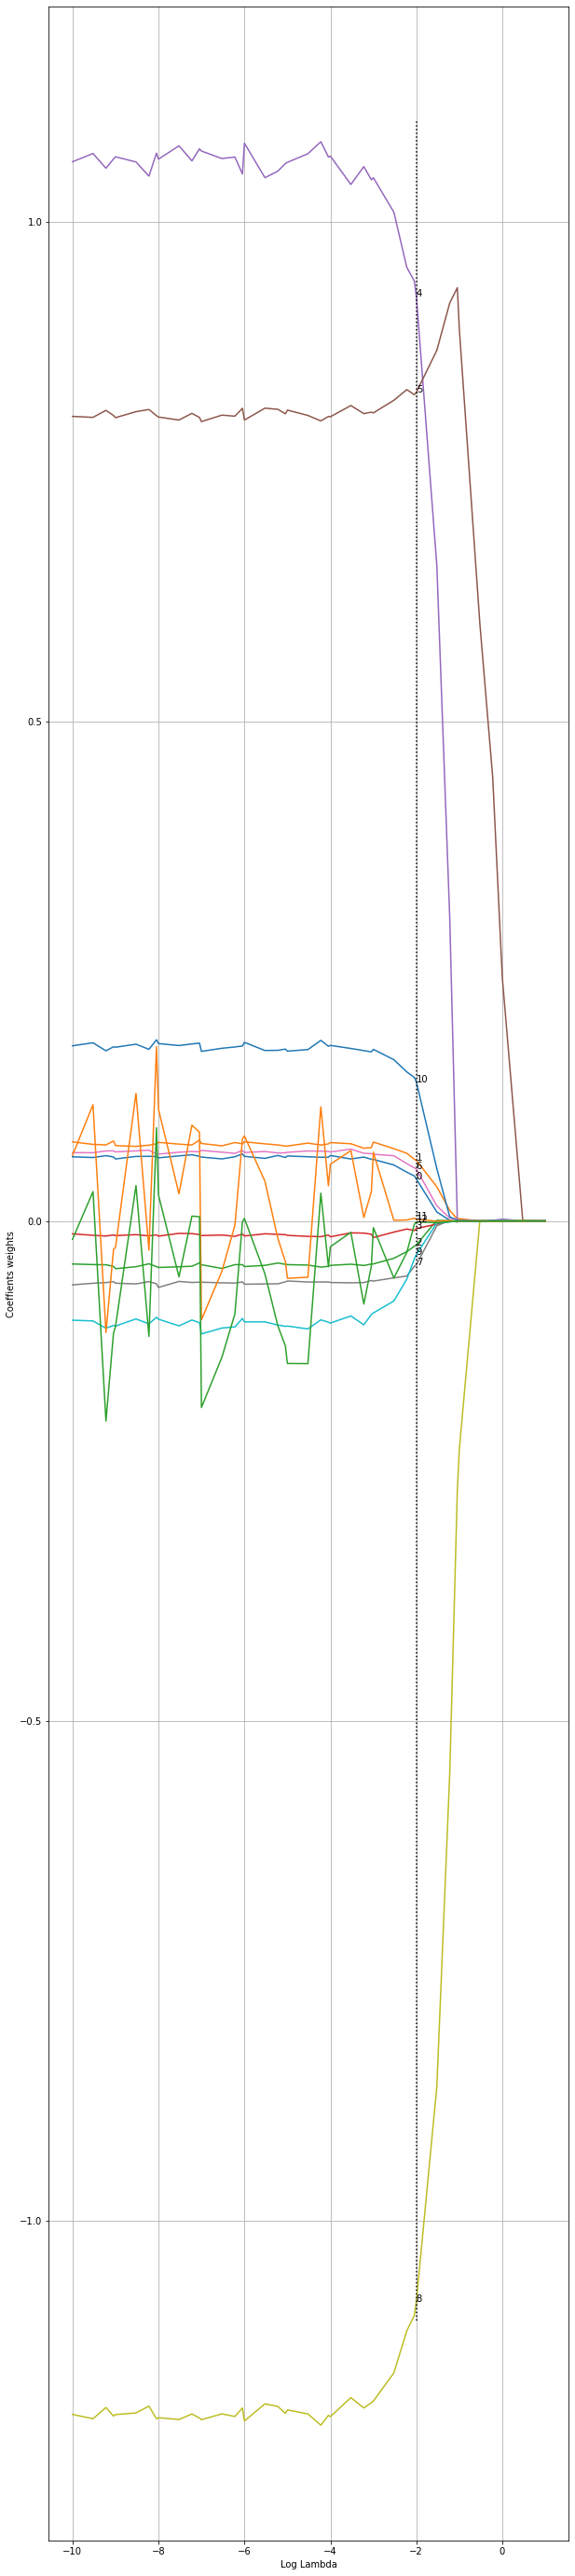

In [ ]:
plt.figure(figsize=(10,50))
plt.plot(log_lambda,df_weights)
# label
plt.xlabel('Log Lambda')
plt.ylabel('Coeffients weights')
plt.grid()
# weight number
for i in range(13):
  plt.text(-2,df_weights.iloc[32][i],'%d'%i)

plt.plot([-2,-2],[-1.1,1.1],'k:')

**Feature selected**

*** : 8,4,5

**: 10

*: 1, 0, 6, 7, 9

In [ ]:
x = pickle.load(open('preprocessing/x_norm.pickle','rb'))

In [ ]:
x.drop('index',axis=1,inplace=True)

In [ ]:
x.iloc[:,[8,4,5,10,1,0,6,7,9]].columns

Index(['NoOfGamesBought', 'FrquncyOfPurchase', 'NoOfUnitsPurchased',
       'fct_Favorite', 'MinAgeOfChild', 'NoOfChildren', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'city_1'],
      dtype='object')

---
*Thanks,*

**FreeAI** *Team*